- ##  Prediction of Australia's Rainfall Tomorrow 

## Content
 - Objective <br>
 - Data Description <br>
 - Data Transformation <br>
 - Exploratory Data Analysis<br>
 - Models and Analysis<br>
     - Linear Regression
     - Support Vector Machine
     - Logistic Regression
     - Decision Tree
     - Random Forest: Best Model
 - Findings and managerial implications<br>
 - Conclusion<br>

 ## Objective


   - The main objective of this project is to predictive the Australia's Tomorrow's rainfall based on 23 features.
   - This dataset contains daily weather observations from numerous Australian weather stations.
   - The target variable RainTomorrow means: Did it rain the next day? Yes or No.

## Data Description

_____Date_____:          The date of observation<br>
____Location____:        The common name of the location of the weather station<br>
_____MinTemp_____:       The minimum temperature in degrees celsius<br>
_____MaxTemp_____:       The maximum temperature in degrees celsius<br>
_____Rainfall_____:      The amount of rainfall recorded for the day in mm<br>
____Evaporation____:     The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
_____Sunshine_____:      The number of hours of bright sunshine in the day.<br>
_____WindGustDir_____:   The direction of the strongest wind gust in the 24 hours to midnight<br>
_____WindGustSpeed_____: The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
_____WindDir9am_____:    Direction of the wind at 9am<br>
_____Pressure9am_____:   Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
_____Pressure3pm_____:   Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
_____Cloud9am_____:      Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths<br> 
_____Cloud3pm_____:      Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br>
_____Temp9am_____:       Temperature (degrees C) at 9am<br>
_____Temp3pm_____:       Temperature (degrees C) at 3pm<br>
_____RainToday_____:     Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
_____RISK_MMT____:      he amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".<br>
_____RainTomorrow_____:  The target variable. Did it rain tomorrow?<br>


This dataset contains daily weather observations from numerous Australian weather stations.

The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data. Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

This dataset is also available via the R package rattle.data and at https://rattle.togaware.com/weatherAUS.csv. Package home page: http://rattle.togaware.com. Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
#import the spam dataset into a dataframe
import pandas as pd
Whether_dataset = pd.read_csv('weatherAUS.csv', encoding='ISO-8859-1');
Whether_dataset_bkp=Whether_dataset

In [4]:
#Just reading the 1st 10 records to understand the stucture of the dataset
Whether_dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


# Exploratory Data Analysis

In [5]:
#Getting the general info of the entire dataset 
Whether_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [6]:
Whether_dataset.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [7]:
#Below are the categorical varaibles
Whether_dataset_bkp.select_dtypes(exclude=[np.number])
    

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No
142189,2017-06-21,Uluru,E,SE,ENE,No,No
142190,2017-06-22,Uluru,NNW,SE,N,No,No
142191,2017-06-23,Uluru,N,SE,WNW,No,No


In [8]:
#Below are the continous variables
Whether_dataset_bkp.select_dtypes(exclude=[np.object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


## Below are categorical variables:
### WindGustDir,windDir3pm,WindDir9am,Date,Location,RainToday,RainTomorrow <br>

## Below are Numercial variables:
### MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM<br>

In [9]:
#Getting the shape of the dataset
Whether_dataset.shape
Whether_dataset.size

(142193, 24)

3412632

In [10]:
#Getting to know more about the dataset by getting statistical information
Whether_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [11]:
#checking the frequency of Y varaible Raintomorrow
Whether_dataset['RainTomorrow'].value_counts().sort_index()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [12]:
#checking the frequency of exploratory Raintoday
Whether_dataset['RainToday'].value_counts().sort_index()

No     109332
Yes     31455
Name: RainToday, dtype: int64

0 is no Rain, 1 is Rain


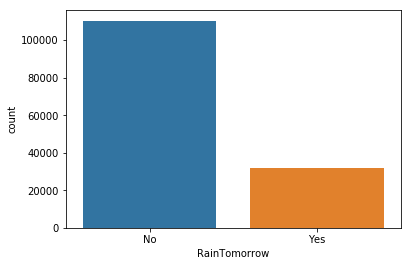

In [13]:
#plotting the frequency of Rain tomorrow
p = sns.countplot(Whether_dataset["RainTomorrow"])
print('0 is no Rain, 1 is Rain')


Text(0.5, 0.98, 'Frequency of rain tomorrow')

0 is no Rain, 1 is Rain


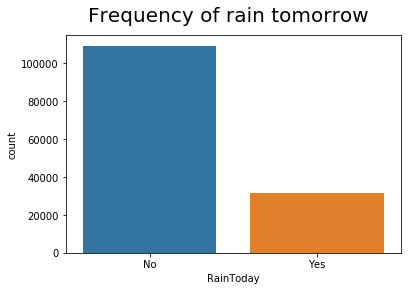

In [14]:
#plotting the frequency of Rain today
p = sns.countplot(Whether_dataset["RainToday"])
plt.suptitle('Frequency of rain tomorrow', fontsize=20)
print('0 is no Rain, 1 is Rain')

# Outlier detection

<Figure size 1296x1296 with 0 Axes>

Text(0.5, 0.98, 'Outlier of All Exploratory Variable')

Text(0, 0.5, 'Humidity3pm')

Text(0, 0.5, 'Pressure9am')

Text(0, 0.5, 'Pressure3pm')

Text(0, 0.5, 'Cloud9am')

Text(0, 0.5, 'Cloud3pm')

Text(0, 0.5, 'Temp9am')

Text(0, 0.5, 'Temp3pm')

Text(0, 0.5, 'RISK_MM')

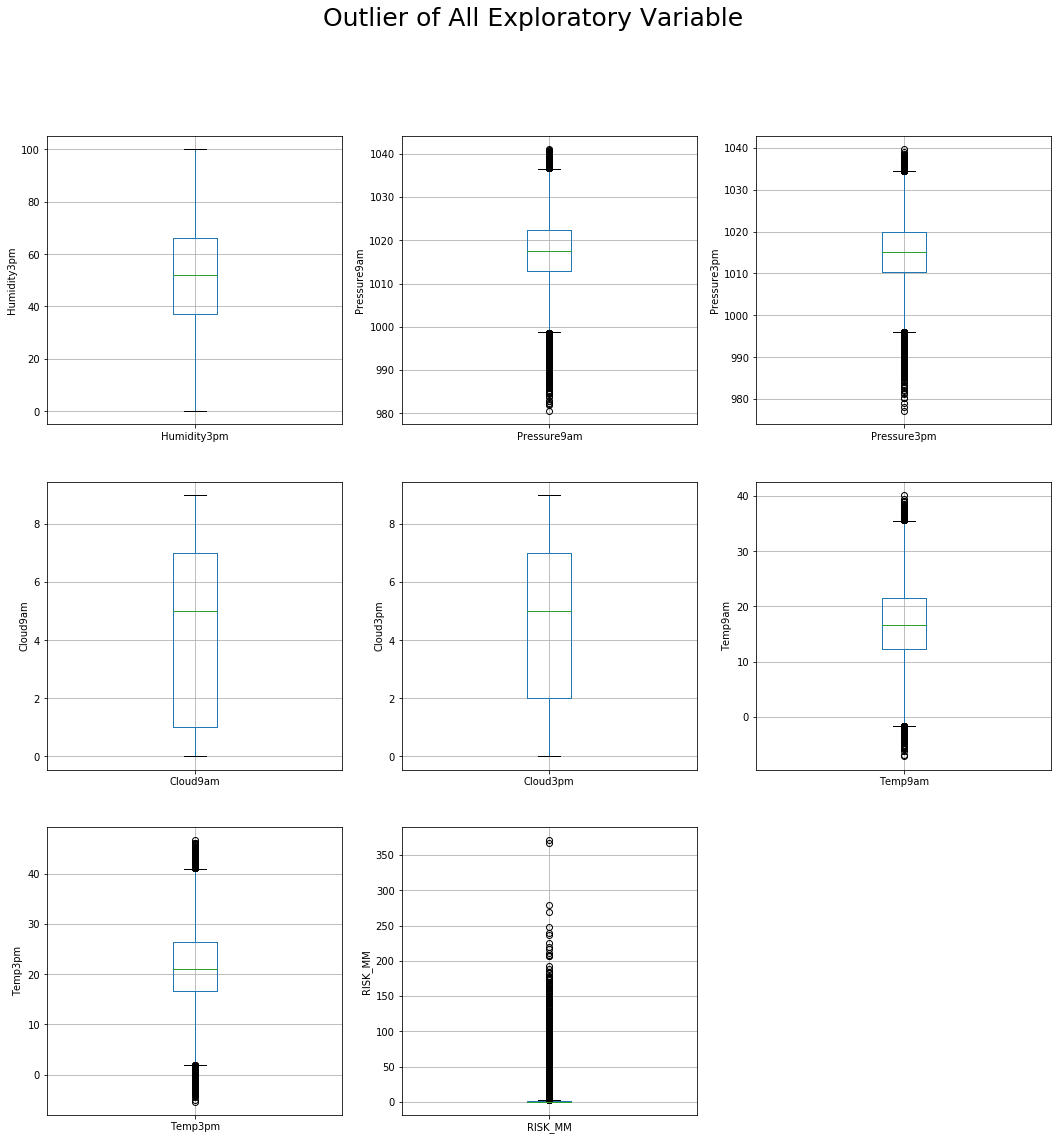

In [15]:
#Checking outliers in the exploratory variable:
plt.figure(figsize=(18,18))
plt.suptitle('Outlier of All Exploratory Variable', fontsize=25)
from matplotlib import pyplot as plt
list1=['Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']
i=1
for k in list1:
    plt.subplot(3, 3, i)
    box = Whether_dataset.boxplot(column=k)
    box.set_ylabel(k)
    i=i+1

<Figure size 1296x1296 with 0 Axes>

Text(0.5, 0.98, 'Outlier of All Exploratory Variable')

Text(0, 0.5, 'MinTemp')

Text(0, 0.5, 'MaxTemp')

Text(0, 0.5, 'Rainfall')

Text(0, 0.5, 'Evaporation')

Text(0, 0.5, 'Sunshine')

Text(0, 0.5, 'WindGustSpeed')

Text(0, 0.5, 'WindSpeed9am')

Text(0, 0.5, 'WindSpeed3pm')

Text(0, 0.5, 'Humidity9am')

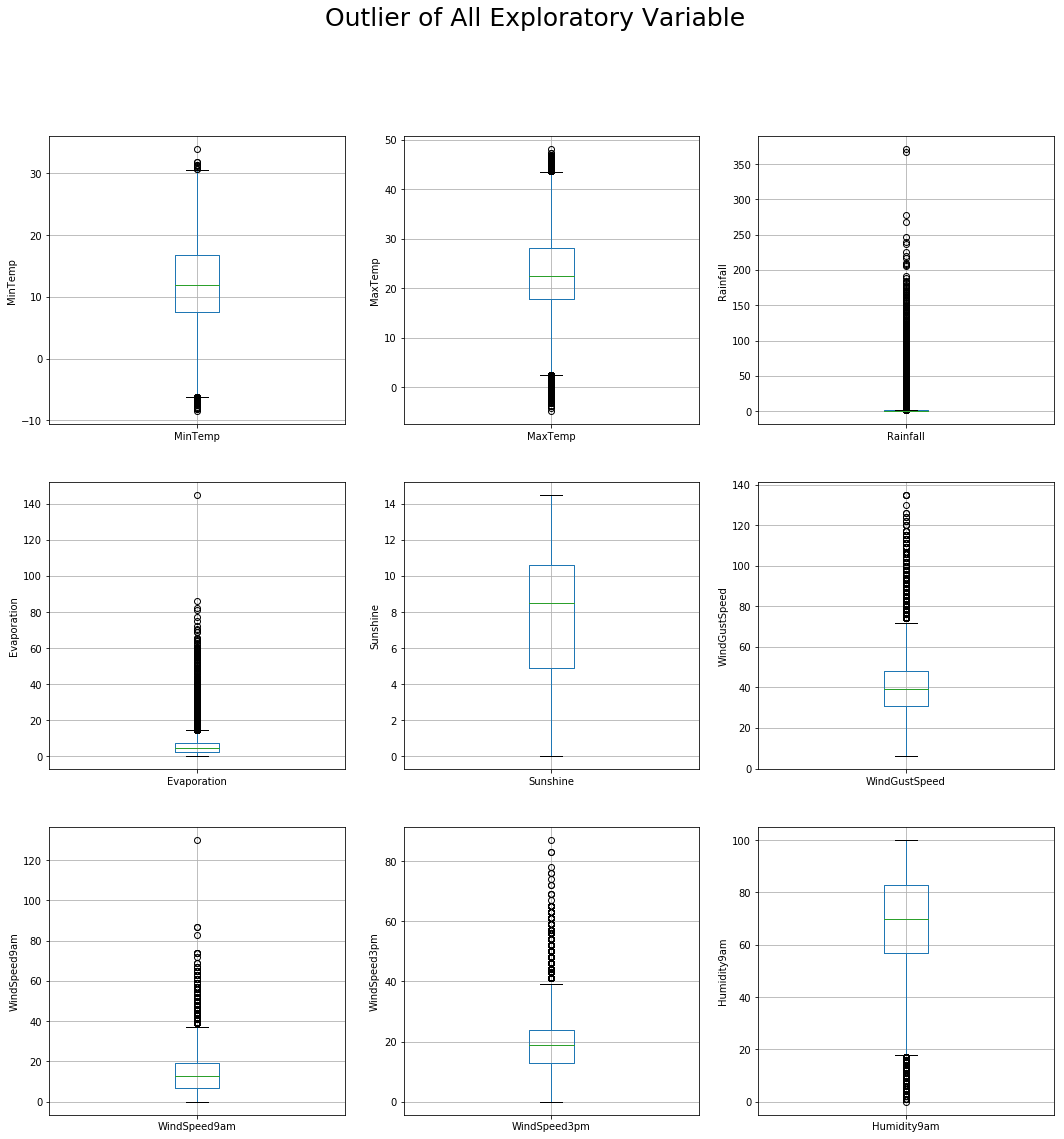

In [16]:
#Checking outliers in the exploratory variable:
plt.figure(figsize=(18,18))
plt.suptitle('Outlier of All Exploratory Variable', fontsize=25)
from matplotlib import pyplot as plt
list1=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am']
i=1
for k in list1:
    plt.subplot(3, 3, i)
    box = Whether_dataset.boxplot(column=k)
    box.set_ylabel(k)
    i=i+1




## The Below variables have the outliers based on the above box plots <br>
_____MinTemp_____:       The minimum temperature in degrees celsius<br>
_____MaxTemp_____:       The maximum temperature in degrees celsius<br>
_____Rainfall_____:      The amount of rainfall recorded for the day in mm<br>
____Evaporation____:     The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
_____WindGustSpeed_____: The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
_____Pressure9am_____:   Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
_____Pressure3pm_____:   Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
_____Temp9am_____:       Temperature (degrees C) at 9am<br>
_____Temp3pm_____:       Temperature (degrees C) at 3pm<br>
_____RainToday_____:     Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
_____RISK_MMT____:      he amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".<br>

### The outliers will be removed based on Z-score or IQR technique

# Heat Map
- Variables with .9 coeff has high correlation
- variables with .3 coeff has low correlation

<Figure size 864x576 with 0 Axes>

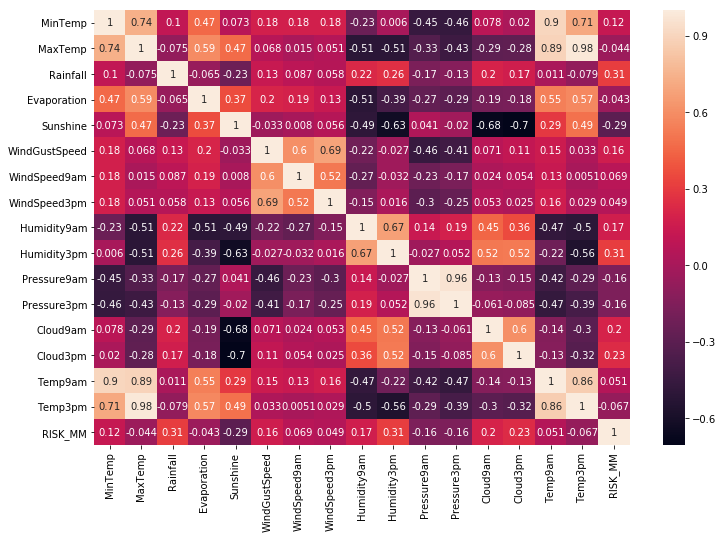

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(Whether_dataset.corr(),annot=True)

In [18]:
# Class count
#count_class_0, count_class_1 = Whether_dataset.RainTomorrow.value_counts()

# Divide by class
#df_class_0 = Whether_dataset[Whether_dataset['RainTomorrow'] == 'No']
#df_class_1 = Whether_dataset[Whether_dataset['RainTomorrow'] == 'Yes']
#count_class_0
#df_class_0_under = df_class_0.sample(3000)
#df_class_1_under = df_class_1.sample(2000)
#Whether_dataset = pd.concat([df_class_0_under, df_class_1_under], axis=0)

## Sampling with only 5000 rows

In [19]:
Whether_dataset = Whether_dataset.sample(n=5000,random_state=0)

In [20]:
Whether_dataset['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

0 is no Rain, 1 is Rain


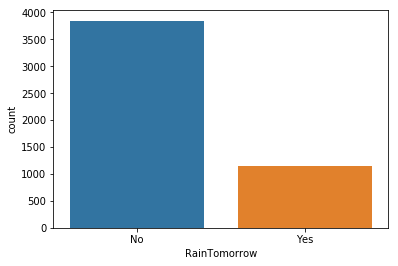

In [21]:
#plotting the frequency of Rain tomorrow
p = sns.countplot(Whether_dataset["RainTomorrow"])
print('0 is no Rain, 1 is Rain')

# Feature Engineering<br>
- Deal with missing values for both categorical and Numerical data
- Transform all categorical variables based on one hot vector
- Transform date to PD date-time and create month year and days
- remove all outliers 

    




# To deal with missing values , for categorical variables:filling the missing values with mode is better and for numerical variables: Imputing Median is a good  Method.

In [22]:
#Determining the number of Null values for the entire dataset
Whether_dataset.isnull().sum()

Date                0
Location            0
MinTemp            32
MaxTemp            14
Rainfall           63
Evaporation      2187
Sunshine         2408
WindGustDir       360
WindGustSpeed     358
WindDir9am        350
WindDir3pm        146
WindSpeed9am       49
WindSpeed3pm      104
Humidity9am        53
Humidity3pm       131
Pressure9am       541
Pressure3pm       542
Cloud9am         1877
Cloud3pm         2011
Temp9am            26
Temp3pm           105
RainToday          63
RISK_MM             0
RainTomorrow        0
dtype: int64

### dropping the unwanted  columns

In [23]:
#Removing missing values for the categorical variables
#Whether_dataset=Whether_dataset.dropna(subset=['WindGustDir'])
#Whether_dataset=Whether_dataset.dropna(subset=['WindDir9am'])
#Whether_dataset=Whether_dataset.dropna(subset=['WindDir3pm'])
#Whether_dataset=Whether_dataset.dropna(subset=['RainToday'])
Whether_dataset['WindGustDir'].unique()
Whether_dataset.drop(['RISK_MM'], axis=1, inplace=True)
Whether_dataset.drop(['Location'], axis=1, inplace=True)

array(['NNE', 'S', 'WSW', 'SW', 'E', 'ESE', 'W', 'NW', 'SSW', 'SSE', 'SE',
       'N', 'WNW', 'ENE', 'NNW', 'NE', nan], dtype=object)

### Imputing the missing values with continous variables

In [24]:
#Imputing missing values for Continuous variables
list1=['Rainfall','MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm']
median=0
for k in list1:
    median = Whether_dataset[k].median()
    Whether_dataset[k].fillna(median, inplace=True)
    median=0

In [25]:
Whether_dataset.isnull().sum()
Whether_dataset.columns

Date               0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      360
WindGustSpeed      0
WindDir9am       350
WindDir3pm       146
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday         63
RainTomorrow       0
dtype: int64

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Imputing the categorical variables with mode values

In [26]:
#Imputing missing values for categorical variables
list1=['WindGustDir','WindDir9am','WindDir3pm','RainToday']
mode=0
#for k in list1:
    #mode = Whether_dataset[k].mode()
    #mode
    #p1=Whether_dataset[k]
    #p1
    #p=Whether_dataset[k].fillna(mode, inplace=True)
    #mode=0
   # Whether_dataset[k].value_counts().index[0])
#Whether_dataset.fillna(Whether_dataset[k1].value_counts().index[0], inplace=True)
#Whether_dataset.loc[(Whether_dataset['WindGustDir'].isnull()), 'WindGustDir'] = Whether_dataset['WindGustDir'].mode()
#Whether_dataset.loc[(Whether_dataset['WindDir9am'].isnull()), 'WindDir9am'] = Whether_dataset['WindDir9am'].mode()
#Whether_dataset.loc[(Whether_dataset['WindDir3pm'].isnull()), 'WindDir3pm'] = Whether_dataset['WindDir3pm'].mode()
#Whether_dataset.loc[(Whether_dataset['RainToday'].isnull()), 'RainToday'] = Whether_dataset['RainToday'].mode()

Whether_dataset["WindGustDir"].fillna("W", inplace = True)
Whether_dataset["WindDir9am"].fillna("W", inplace = True)
Whether_dataset["WindDir3pm"].fillna("W", inplace = True)
Whether_dataset["RainToday"].fillna("No", inplace = True)
    #Whether_dataset.fillna(Whether_dataset['WindGustDir'].mode()[0], inplace=True)
    #Whether_dataset.fillna(Whether_dataset['WindGustDir'].mode()[0], inplace=True)
    #Whether_dataset.fillna(Whether_dataset['WindGustDir'].mode()[0], inplace=True)
   

### Displaying the mode values

In [27]:
Whether_dataset['WindGustDir'].value_counts().sort_index()
Whether_dataset['WindDir9am'].value_counts().sort_index()
Whether_dataset['WindDir3pm'].value_counts().sort_index()
Whether_dataset['RainToday'].value_counts().sort_index()

E      335
ENE    285
ESE    245
N      305
NE     273
NNE    208
NNW    228
NW     278
S      276
SE     332
SSE    321
SSW    291
SW     323
W      711
WNW    267
WSW    322
Name: WindGustDir, dtype: int64

E      302
ENE    278
ESE    279
N      416
NE     290
NNE    293
NNW    257
NW     333
S      272
SE     324
SSE    312
SSW    253
SW     248
W      636
WNW    259
WSW    248
Name: WindDir9am, dtype: int64

E      305
ENE    245
ESE    311
N      283
NE     274
NNE    229
NNW    281
NW     279
S      368
SE     347
SSE    307
SSW    263
SW     350
W      514
WNW    306
WSW    338
Name: WindDir3pm, dtype: int64

No     3902
Yes    1098
Name: RainToday, dtype: int64

In [28]:
Whether_dataset

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
86232,2012-10-09,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,NNE,...,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No,No
57576,2011-05-24,6.8,14.4,0.8,0.8,8.6,S,46.0,SW,S,...,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No,No
124071,2009-08-06,10.1,15.4,14.6,4.8,8.6,WSW,31.0,SW,SSE,...,70.0,61.0,1014.4,1016.1,5.0,5.0,12.3,13.0,Yes,No
117955,2009-03-06,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,SW,...,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No,No
133468,2010-07-02,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,ESE,...,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68406,2009-08-15,5.6,27.6,0.0,4.0,9.6,NNE,56.0,NNE,N,...,50.0,15.0,1015.4,1010.2,1.0,1.0,12.9,27.0,No,Yes
119955,2014-11-24,11.8,27.0,0.0,8.0,13.2,SW,39.0,ESE,SW,...,46.0,42.0,1022.1,1018.1,0.0,1.0,19.2,23.4,No,No
49562,2014-02-24,10.6,29.4,0.0,4.8,8.6,NE,35.0,W,NE,...,78.0,28.0,1019.5,1015.4,5.0,5.0,14.9,28.9,No,No
40925,2016-03-09,20.1,33.6,0.0,7.2,11.2,ENE,39.0,NNE,ENE,...,70.0,45.0,1022.1,1017.9,1.0,1.0,25.1,32.2,No,No


### There are no more null values as confirmed below

In [29]:
#Determining the number of Null values for the entire dataset just to see if null values are removed for Categorical variables
Whether_dataset.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [30]:
#Removing outliers based on Z-score

from scipy import stats
outlier = np.abs(stats.zscore(Whether_dataset._get_numeric_data()))
Whether_dataset= Whether_dataset[(outlier < 3).all(axis=1)]
Whether_dataset

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
86232,2012-10-09,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,NNE,...,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No,No
57576,2011-05-24,6.8,14.4,0.8,0.8,8.6,S,46.0,SW,S,...,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No,No
124071,2009-08-06,10.1,15.4,14.6,4.8,8.6,WSW,31.0,SW,SSE,...,70.0,61.0,1014.4,1016.1,5.0,5.0,12.3,13.0,Yes,No
117955,2009-03-06,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,SW,...,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No,No
133468,2010-07-02,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,ESE,...,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64957,2015-04-30,5.4,19.3,0.0,1.6,10.1,SSE,28.0,N,SSE,...,76.0,41.0,1031.8,1028.5,1.0,1.0,11.3,19.2,No,No
68406,2009-08-15,5.6,27.6,0.0,4.0,9.6,NNE,56.0,NNE,N,...,50.0,15.0,1015.4,1010.2,1.0,1.0,12.9,27.0,No,Yes
119955,2014-11-24,11.8,27.0,0.0,8.0,13.2,SW,39.0,ESE,SW,...,46.0,42.0,1022.1,1018.1,0.0,1.0,19.2,23.4,No,No
49562,2014-02-24,10.6,29.4,0.0,4.8,8.6,NE,35.0,W,NE,...,78.0,28.0,1019.5,1015.4,5.0,5.0,14.9,28.9,No,No


### One hot vector encoding

In [31]:
#transforming Location based on one hot vector

#Whether_dataset["Location"] = Whether_dataset["Location"].astype('category',Whether_dataset['Location'].unique())

# now call .get_dummies() as usual

#Whether_dataset = pd.concat([Whether_dataset,pd.get_dummies(Whether_dataset['Location'], prefix='Location',dummy_na=True)],axis=1).drop(['Location'],axis=1)

In [32]:
#transforming WindGustDir based on one hot vector

Whether_dataset["WindGustDir"] = Whether_dataset["WindGustDir"].astype('category',Whether_dataset['WindGustDir'].unique())

# now call .get_dummies() as usual

Whether_dataset = pd.concat([Whether_dataset,pd.get_dummies(Whether_dataset['WindGustDir'], prefix='WindGustDir',dummy_na=True)],axis=1).drop(['WindGustDir'],axis=1)

C:\Users\jayjay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#transforming WindDir9am based on one hot vector

Whether_dataset["WindDir9am"] = Whether_dataset["WindDir9am"].astype('category',Whether_dataset['WindDir9am'].unique())

# now call .get_dummies() as usual

Whether_dataset = pd.concat([Whether_dataset,pd.get_dummies(Whether_dataset['WindDir9am'], prefix='WindDir9am',dummy_na=True)],axis=1).drop(['WindDir9am'],axis=1)

In [34]:
#transforming WindDir3pm based on one hot vector

Whether_dataset["WindDir3pm"] = Whether_dataset["WindDir3pm"].astype('category',Whether_dataset['WindDir3pm'].unique())

# now call .get_dummies() as usual

Whether_dataset = pd.concat([Whether_dataset,pd.get_dummies(Whether_dataset['WindDir3pm'], prefix='WindDir3pm',dummy_na=True)],axis=1).drop(['WindDir3pm'],axis=1)

### Binary Labeling

In [35]:
Whether_dataset.loc[(Whether_dataset['RainToday'] == 'No'), 'RainToday'] = 0
Whether_dataset.loc[(Whether_dataset['RainToday'] == 'Yes'), 'RainToday'] = 1
Whether_dataset.loc[(Whether_dataset['RainTomorrow'] == 'No'), 'RainTomorrow'] = 0
Whether_dataset.loc[(Whether_dataset['RainTomorrow'] == 'Yes'), 'RainTomorrow'] = 1

In [36]:
#Date to days, months and year conversion
#Whether_dataset['Date'] = pd.to_datetime(Whether_dataset['Date'])
#Whether_dataset['Year'] = Whether_dataset['Date'].dt.year
#Whether_dataset['Month'] = Whether_dataset['Date'].dt.month
#Whether_dataset['Day'] = Whether_dataset['Date'].dt.day


In [37]:
#Dropping all irrelavent varaibles 
#Whether_dataset.drop('Location_nan', axis=1, inplace=True)
Whether_dataset.drop('WindGustDir_nan', axis=1, inplace=True)
Whether_dataset.drop('WindDir9am_nan', axis=1, inplace=True)
Whether_dataset.drop('WindDir3pm_nan', axis=1, inplace=True)
Whether_dataset.drop('Date', axis=1, inplace=True)


In [38]:
#Trying to get list of all columns
Whether_dataset.columns.values.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'WindDir

In [39]:
Whether_dataset

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.6,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,14.6,4.8,8.6,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,10.0,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64957,5.4,19.3,0.0,1.6,10.1,28.0,11.0,15.0,76.0,41.0,...,0,0,0,0,1,0,0,0,0,0
68406,5.6,27.6,0.0,4.0,9.6,56.0,17.0,33.0,50.0,15.0,...,0,0,0,0,0,0,0,0,0,0
119955,11.8,27.0,0.0,8.0,13.2,39.0,13.0,20.0,46.0,42.0,...,0,0,0,0,0,0,1,0,0,0
49562,10.6,29.4,0.0,4.8,8.6,35.0,0.0,7.0,78.0,28.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
feature_cols=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'WindDir3pm_NW',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW',
 'WindDir3pm_SW',
 'WindDir3pm_W',
 'WindDir3pm_WNW',
 'WindDir3pm_WSW']

### Feature splitting 

In [41]:
#split dataset in features and target variable

X = Whether_dataset[feature_cols]
y = Whether_dataset.RainTomorrow # Target variable

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### scaling based on minmax
- scaling based on mimax is prefered to standard scalar because the dataset consists of many outliers 
- Minmax preserves the variation in the dataset better than standard scalar

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Hard voting

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score

log_clf = LogisticRegression(solver = 'liblinear', multi_class = 'auto', max_iter = 50, random_state = 0)
log_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dtree_clf.fit(X_train, y_train)
svm_clf = SVC(kernel = 'linear', C = 0.001, probability = True, random_state = 0)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dtree_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dtree_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

train_macro_recall = recall_score(y_train, voting_clf.predict(X_train), average = "macro")
print('Recall score: {:.4f}'.format(train_macro_recall))
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decisio...inear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression 0.8439108061749572


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier 0.8138936535162951


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC 0.7847341337907375


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decisio...inear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

VotingClassifier 0.8353344768439108
Recall score: 0.6690
Train score: 0.84
Test score: 0.84


array([[888,  27],
       [165,  86]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddf12ad3c8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddf12b6128>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       915
           1       0.76      0.34      0.47       251

   micro avg       0.84      0.84      0.84      1166
   macro avg       0.80      0.66      0.69      1166
weighted avg       0.83      0.84      0.81      1166

          


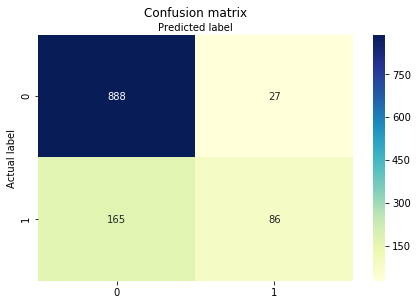

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

# Soft voting

In [174]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dtree_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dtree_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

    
train_macro_recall = recall_score(y_train, voting_clf.predict(X_train), average = "macro")
print('Recall score: {:.4f}'.format(train_macro_recall))
print('Train score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(clf.score(X_test, y_test)))

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decisio...inear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression 0.8439108061749572


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier 0.8138936535162951


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

SVC 0.7847341337907375


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decisio...inear', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

VotingClassifier 0.839622641509434
Recall score: 0.7022
Train score: 0.85
Test score: 0.84


array([[881,  34],
       [153,  98]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddeee11a20>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddeee1a7b8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       915
           1       0.74      0.39      0.51       251

   micro avg       0.84      0.84      0.84      1166
   macro avg       0.80      0.68      0.71      1166
weighted avg       0.83      0.84      0.82      1166

          


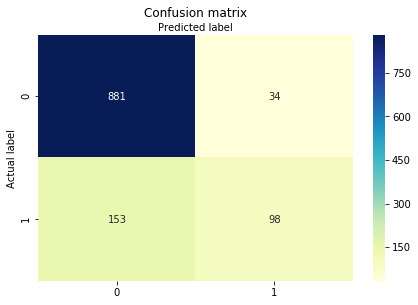

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

# Bagging KNN Regression

# Grid Search for knn

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error

KNN = KNeighborsClassifier(n_neighbors = 10)

param_grid = {'n_estimators': [100,200,300],
             'max_samples': [100,200,300]}
grid_search = GridSearchCV(BaggingClassifier(KNN), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_samples': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'max_samples': 300, 'n_estimators': 300}
Best cross-validation score: 0.79


# Implementing with Best parameters

In [157]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

KNN = KNeighborsClassifier(n_neighbors = 10)
bag_clf = BaggingClassifier(KNN, n_estimators=300, max_samples=300, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
ynew=bag_clf.predict(X_test)
y_train_pred=bag_clf.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=300, n_estimators=300, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

accuracy score: 0.7855917667238422
Train score: 0.79
Test score: 0.79
Train mean squared error 0.2107520732056048
Train mean squared error 0.2144082332761578


array([[915,   0],
       [251,   0]], dtype=int64)

([<matplotlib.axis.XTick at 0x2de3215a3c8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2de32163080>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       915
           1       0.00      0.00      0.00       251

   micro avg       0.78      0.78      0.78      1166
   macro avg       0.39      0.50      0.44      1166
weighted avg       0.62      0.78      0.69      1166

          


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


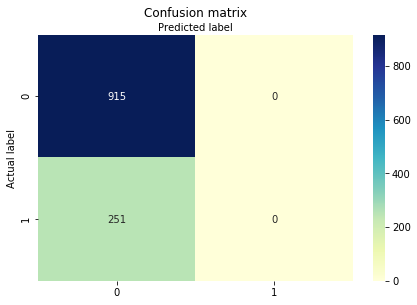

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

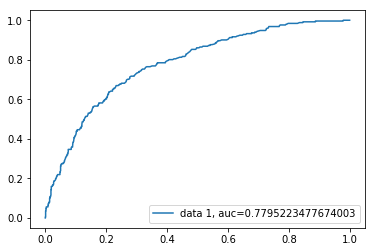

In [59]:
y_pred_proba = bag_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Bagging - Decision Tree

# Grid search to get best parameter

In [60]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')

param_grid = {'n_estimators': [100,200,300],
             'max_samples': [100,200,300]}
grid_search = GridSearchCV(BaggingClassifier(dtree), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...stimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_samples': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'max_samples': 100, 'n_estimators': 200}
Best cross-validation score: 0.84


# Implementing with best parameter

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')

bag_clf = BaggingClassifier(dtree, n_estimators=100, max_samples=200, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
ynew=bag_clf.predict(X_test)
y_train_pred=bag_clf.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=200, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

accuracy score: 0.8387650085763293
Train score: 0.84
Test score: 0.84
Train mean squared error 0.1564197883900486
Train mean squared error 0.16123499142367068


array([[884,  31],
       [157,  94]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddf6470a90>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddf13a9940>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       915
           1       0.75      0.37      0.50       251

   micro avg       0.84      0.84      0.84      1166
   macro avg       0.80      0.67      0.70      1166
weighted avg       0.83      0.84      0.82      1166

          


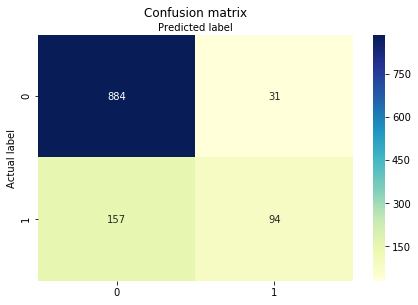

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

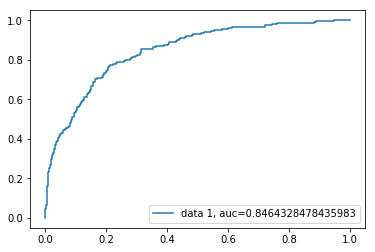

In [63]:
y_pred_proba = bag_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN pasting

# Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV

KNN = KNeighborsClassifier(n_neighbors = 10)
param_grid = {'n_estimators': [100,200,300],
             'max_samples': [100,200,300],'bootstrap':[False]}

grid_search = GridSearchCV(BaggingClassifier(KNN), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_samples': [100, 200, 300], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'bootstrap': False, 'max_samples': 300, 'n_estimators': 100}
Best cross-validation score: 0.79


# Findings for best parameter

In [171]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 10)
bag_clf = BaggingClassifier(KNN, n_estimators=100, max_samples=300, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
ynew=bag_clf.predict(X_test)
y_train_pred=bag_clf.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=300, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

accuracy score: 0.7855917667238422
Train score: 0.79
Test score: 0.79
Train mean squared error 0.21018015441807264
Train mean squared error 0.2144082332761578


array([[915,   0],
       [250,   1]], dtype=int64)

([<matplotlib.axis.XTick at 0x2de3710e668>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2de371173c8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       915
           1       1.00      0.00      0.01       251

   micro avg       0.79      0.79      0.79      1166
   macro avg       0.89      0.50      0.44      1166
weighted avg       0.83      0.79      0.69      1166

          


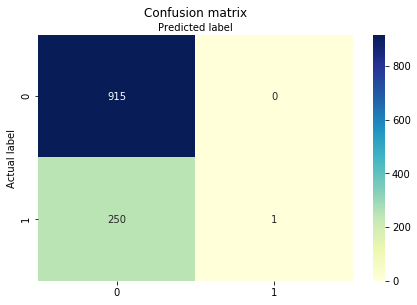

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

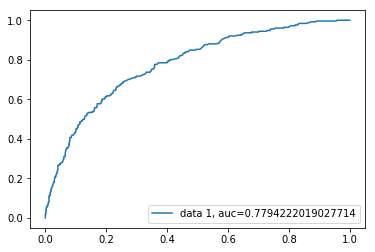

In [67]:
y_pred_proba = bag_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Pasting for decision tree

# Grid Search for decision tree

In [68]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')
param_grid = {'n_estimators': [100,200,300],
             'max_samples': [100,200,300],
             'bootstrap':[False]}
grid_search = GridSearchCV(BaggingClassifier(dtree), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            ...stimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'max_samples': [100, 200, 300], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'bootstrap': False, 'max_samples': 100, 'n_estimators': 300}
Best cross-validation score: 0.84


# Best parameters for the model

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')

bag_clf = BaggingClassifier(dtree, n_estimators=100, max_samples=100, bootstrap=False, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))
ynew=bag_clf.predict(X_test)
y_train_pred=bag_clf.predict(X_train)
print("Train mean squared error {}".format(mean_squared_error(y_train_pred,y_train)))
print("Train mean squared error {}".format(mean_squared_error(ynew,y_test)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

accuracy score: 0.8353344768439108
Train score: 0.84
Test score: 0.84
Train mean squared error 0.15527595081498427
Train mean squared error 0.1646655231560892


array([[891,  24],
       [168,  83]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddf67b3f60>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddf67a29e8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       915
           1       0.78      0.33      0.46       251

   micro avg       0.84      0.84      0.84      1166
   macro avg       0.81      0.65      0.68      1166
weighted avg       0.83      0.84      0.81      1166

          


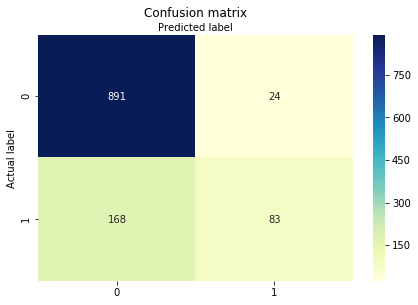

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

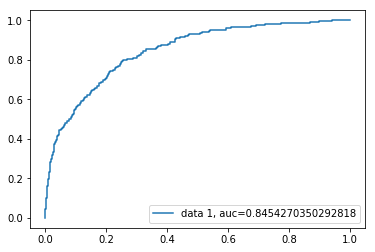

In [71]:
y_pred_proba = bag_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Adaboost for logistic regression

# Grid search for best params

In [73]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV

logreg= LogisticRegression(penalty = 'l1', C = 1,random_state=0,solver='liblinear')

param_grid = {'n_estimators': [100,150,200,300],
             'learning_rate': [0.5,1,1.5,2]}
grid_search = GridSearchCV(AdaBoostClassifier(logreg), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 150, 200, 300], 'learning_rate': [0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.79


In [74]:
#Implementing Best parameter

from sklearn.ensemble import AdaBoostClassifier 
logreg= LogisticRegression(penalty = 'l1', C = 1,random_state=0,solver='liblinear')

ada_clf = AdaBoostClassifier(logreg, n_estimators=100, algorithm="SAMME.R",learning_rate=0.5,random_state=0)
ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=100, random_state=0)

accuracy score: 0.7847341337907375
Train score: 0.84
Test score: 0.84


array([[915,   0],
       [251,   0]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddf6729e48>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddf67155f8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       915
           1       0.00      0.00      0.00       251

   micro avg       0.78      0.78      0.78      1166
   macro avg       0.39      0.50      0.44      1166
weighted avg       0.62      0.78      0.69      1166

          


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


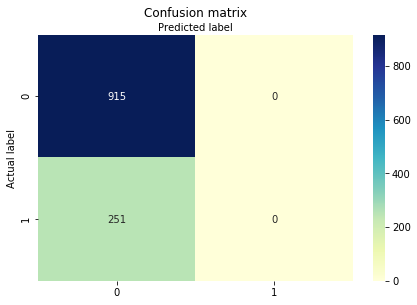

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

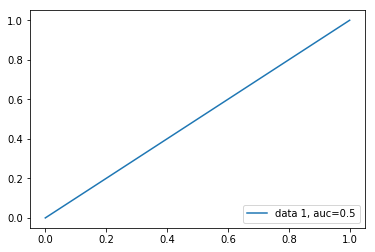

In [76]:
y_pred_proba = ada_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Adaboosting for decision trees

In [77]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')
param_grid = {'n_estimators': [100,150,200,300],
             'learning_rate': [0.5,1,1.5,2]}
grid_search = GridSearchCV(AdaBoostClassifier(dtree), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 150, 200, 300], 'learning_rate': [0.5, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'learning_rate': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.81


In [78]:
#Implementing Best parameter
dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')

ada_clf = AdaBoostClassifier(dtree, n_estimators=300, algorithm="SAMME.R",learning_rate=0.5,random_state=0)
ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=300, random_state=0)

accuracy score: 0.7950257289879932
Train score: 0.84
Test score: 0.84


array([[831,  84],
       [155,  96]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddf68baf98>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddf68c0cf8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       915
           1       0.53      0.38      0.45       251

   micro avg       0.80      0.80      0.80      1166
   macro avg       0.69      0.65      0.66      1166
weighted avg       0.78      0.80      0.78      1166

          


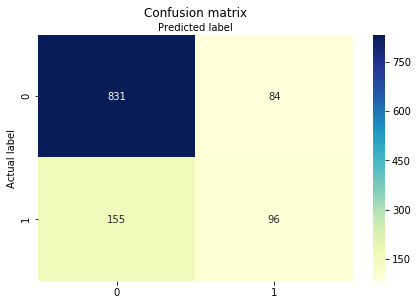

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

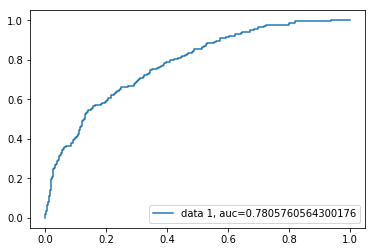

In [80]:
y_pred_proba = ada_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient boosting

In [82]:
from  sklearn.ensemble import  GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=3, n_estimators=15, learning_rate=0.2, random_state=0)
param_grid = {'n_estimators': [100,200,300],
             'learning_rate': [0.5,1,1.5,2],
             'max_depth':[2,3,4]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.5, 1, 1.5, 2], 'max_depth': [2, 3, 4]}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.5, 1, 1.5, 2], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.83


In [83]:
#implementing again for the best paratmeters
gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.5, random_state=0)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

print("Train score {}".format(gb_clf.score(X_train, y_train)))
print("Test score {}".format(gb_clf.score(X_test, y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

0.8413379073756432
Train score 0.9102087503574492
Test score 0.8413379073756432


array([[867,  48],
       [137, 114]], dtype=int64)

([<matplotlib.axis.XTick at 0x2ddf69d30f0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2ddf69d3e10>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       915
           1       0.70      0.45      0.55       251

   micro avg       0.84      0.84      0.84      1166
   macro avg       0.78      0.70      0.73      1166
weighted avg       0.83      0.84      0.83      1166

          


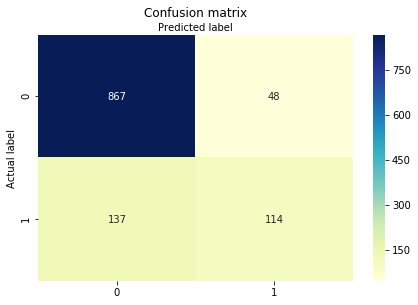

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

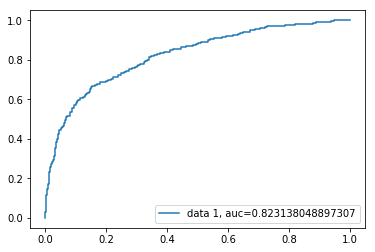

In [85]:
y_pred_proba = gb_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# PCA for entire dataset

In [86]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
s = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

49

# Applying PCA for the reduced number of components

In [87]:
pca = PCA(n_components = 49)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

PCA(copy=True, iterated_power='auto', n_components=49, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Logistic regression for PCA

In [88]:
from sklearn.model_selection import GridSearchCV

lgreg= LogisticRegression(penalty = 'l2', C = 1)

param_grid = {'C': [0.01, 0.1, 1, 10, 100,200],'penalty' : ['l1','l2']}
grid_search = GridSearchCV(lgreg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 200], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.84


In [90]:
#running with best parameter
lgreg= LogisticRegression(penalty = 'l2', C = 1)
lgreg.fit(X_train_reduced,y_train)
y_pred = lgreg.predict(X_test_reduced)

print("Train Score: {}".format(lgreg.score(X_train_reduced,y_train)))
print("Test score: {:.2f}".format(lgreg.score(X_test_reduced,y_test)))

C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train Score: 0.8467257649413783
Test score: 0.83


array([[867,  48],
       [151, 100]], dtype=int64)

([<matplotlib.axis.XTick at 0x2dd831adf28>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2dd831abc88>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       915
           1       0.68      0.40      0.50       251

   micro avg       0.83      0.83      0.83      1166
   macro avg       0.76      0.67      0.70      1166
weighted avg       0.81      0.83      0.81      1166

          


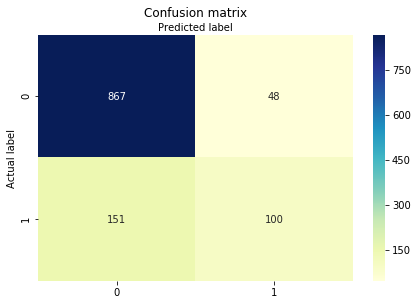

In [91]:
y_pred = lgreg.predict(X_test_reduced)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

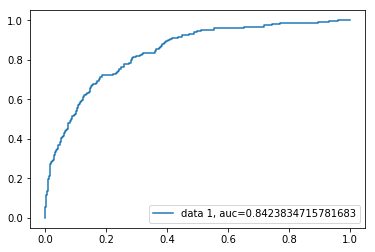

In [93]:
y_pred_proba = lgreg.predict_proba(X_test_reduced
                                  )[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# PCA FOR KNN

In [94]:
#Grid search
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'n_neighbors': 13}
Best cross-validation score: 0.80


In [95]:
# Applying Best Parameters
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

Train score: 0.8156
Test score: 0.8002


array([[901,  14],
       [219,  32]], dtype=int64)

([<matplotlib.axis.XTick at 0x2dd833092e8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2dd832d2160>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.80      0.98      0.89       915
           1       0.70      0.13      0.22       251

   micro avg       0.80      0.80      0.80      1166
   macro avg       0.75      0.56      0.55      1166
weighted avg       0.78      0.80      0.74      1166

          


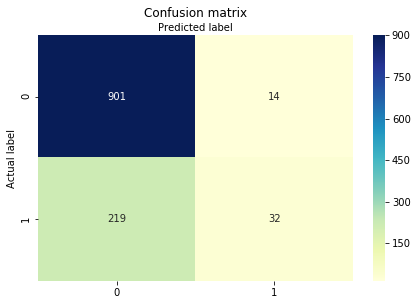

In [96]:
y_pred = knn.predict(X_test_reduced)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

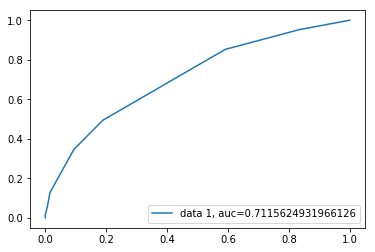

In [97]:
y_pred_proba = knn.predict_proba(X_test_reduced)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# PCA for decision tree

In [98]:
#Grid search
dtree = DecisionTreeClassifier(random_state=0)
param_grid = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8]}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dtree, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'criterion': 'entropy', 'max_depth': 3}
Best cross-validation score: 0.80


In [99]:
#Implementing with best parameter
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=3)

dtree.fit(X_train_reduced, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Accuracy on training set: 0.809
Accuracy on test set: 0.800


array([[889,  26],
       [207,  44]], dtype=int64)

([<matplotlib.axis.XTick at 0x2dd83551eb8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2dd83553cc0>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       915
           1       0.63      0.18      0.27       251

   micro avg       0.80      0.80      0.80      1166
   macro avg       0.72      0.57      0.58      1166
weighted avg       0.77      0.80      0.75      1166

          


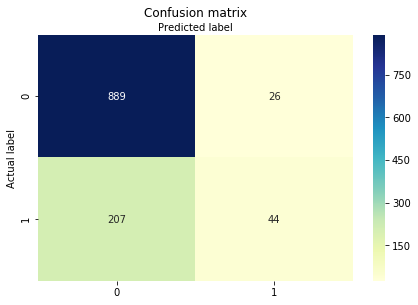

In [100]:
y_pred = dtree.predict(X_test_reduced)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

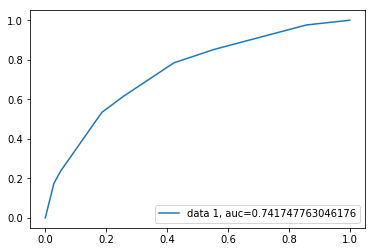

In [101]:
y_pred_proba = dtree.predict_proba(X_test_reduced)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# PCA for linear SVM

In [102]:
param_grid = {'C': [0.1,1, 10, 100,1000], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,cv = 5,refit=True,verbose=3)
grid.fit(X_train_reduced,y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=0.1, kernel=linear, score=0.8242857142857143, total=   0.1s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ... C=0.1, kernel=linear, score=0.8242857142857143, total=   0.1s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ... C=0.1, kernel=linear, score=0.8371428571428572, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.8197424892703863, total=   0.1s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.8495702005730659, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8342857142857143, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] ................... C=1, kernel=linear, score=0.84, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] ................... C=1, kernel=linear, score=0.84, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] ....... C=1, kernel=linear, score=0.82689556509299, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.84


In [103]:
# PCA FOR LINEAR SVM with best parameter
from sklearn.svm import LinearSVC
clf = SVC(C=1,kernel='linear')
clf.fit(X_train_reduced, y_train)
print(clf.score(X_train_reduced,y_train))
print("Train Score: {}".format(clf.score(X_train_reduced,y_train)))
print("Test score: {:.2f}".format(clf.score(X_test_reduced,y_test)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

0.8441521303974836
Train Score: 0.8441521303974836
Test score: 0.83


array([[874,  41],
       [160,  91]], dtype=int64)

([<matplotlib.axis.XTick at 0x2dd836368d0>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2dd836416d8>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       915
           1       0.69      0.36      0.48       251

   micro avg       0.83      0.83      0.83      1166
   macro avg       0.77      0.66      0.69      1166
weighted avg       0.81      0.83      0.81      1166

          


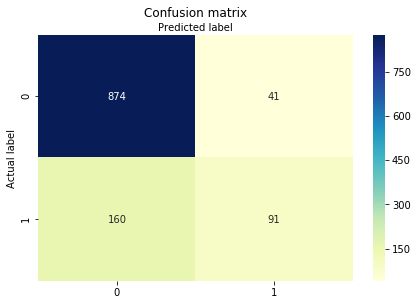

In [104]:
y_pred = clf.predict(X_test_reduced)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

Text(0.5, 0, 'Precision')

Text(0, 0.5, 'Recall')

AUC curve 0.8388174079637734


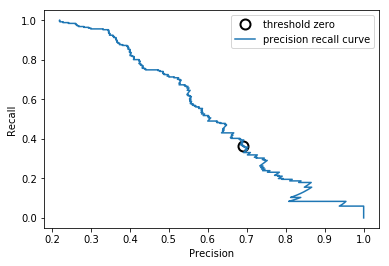

In [108]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

precision, recall, thresholds = precision_recall_curve(y_test, clf.decision_function(X_test_reduced))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
auc = roc_auc_score(y_test, clf.decision_function(X_test_reduced))
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

print("AUC curve", auc)

# PCA FOR LINEAR SVC

In [109]:
param_grid = {'C': [0.1,1, 10, 100,1000]} 
grid = GridSearchCV(LinearSVC(),param_grid,cv = 5,refit=True,verbose=3)
grid.fit(X_train_reduced,y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................
[CV] ................................ C=0.1, score=0.84, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ................................ C=0.1, score=0.84, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8471428571428572, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8240343347639485, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .................. C=0.1, score=0.8495702005730659, total=   0.0s
[CV] C=1 .............................................................
[CV] .................................. C=1, score=0.84, total=   0.0s
[CV] C=1 .............................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=1, score=0.85, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.8254649499284692, total=   0.0s
[CV] C=1 .............................................................
[CV] .................... C=1, score=0.8452722063037249, total=   0.0s
[CV] C=10 ............................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=10, score=0.84, total=   0.3s
[CV] C=10 ............................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=10, score=0.8428571428571429, total=   0.2s
[CV] C=10 ............................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................. C=10, score=0.85, total=   0.2s
[CV] C=10 ............................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=10, score=0.8254649499284692, total=   0.2s
[CV] C=10 ............................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................... C=10, score=0.8452722063037249, total=   0.3s
[CV] C=100 ...........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=100, score=0.8214285714285714, total=   0.3s
[CV] C=100 ...........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=100, score=0.8314285714285714, total=   0.4s
[CV] C=100 ...........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=100, score=0.8185714285714286, total=   0.3s
[CV] C=100 ...........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=100, score=0.7896995708154506, total=   0.3s
[CV] C=100 ...........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=100, score=0.8137535816618912, total=   0.3s
[CV] C=1000 ..........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=1000, score=0.7228571428571429, total=   0.3s
[CV] C=1000 ..........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=1000, score=0.6942857142857143, total=   0.4s
[CV] C=1000 ..........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................. C=1000, score=0.7957142857142857, total=   0.4s
[CV] C=1000 ..........................................................


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .................. C=1000, score=0.630901287553648, total=   0.3s
[CV] C=1000 ..........................................................
[CV] ................. C=1000, score=0.7765042979942693, total=   0.3s


C:\Users\jayjay\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=3)

Best parameters: {'C': 1}
Best cross-validation score: 0.84


In [110]:
#Implementing with best parameter
svm = LinearSVC(C=1)
svm.fit(X_train_reduced, y_train)
            
print("train_score: {}".format(svm.score(X_train_reduced,y_train)))
print("test_score: {}".format(svm.score(X_test_reduced,y_test)))

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

train_score: 0.8441521303974836
test_score: 0.8293310463121784


array([[873,  42],
       [157,  94]], dtype=int64)

([<matplotlib.axis.XTick at 0x2dd85d313c8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2dd85d35128>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       915
           1       0.69      0.37      0.49       251

   micro avg       0.83      0.83      0.83      1166
   macro avg       0.77      0.66      0.69      1166
weighted avg       0.81      0.83      0.81      1166

          


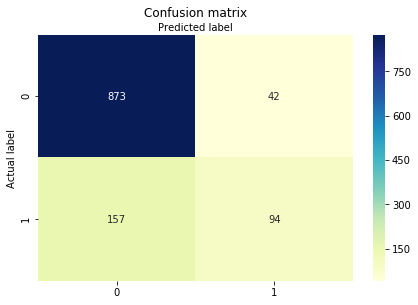

In [112]:
y_pred = svm.predict(X_test_reduced)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

Text(0.5, 0, 'FPR')

Text(0, 0.5, 'TPR (recall)')

AUC curve 0.8419524089434611


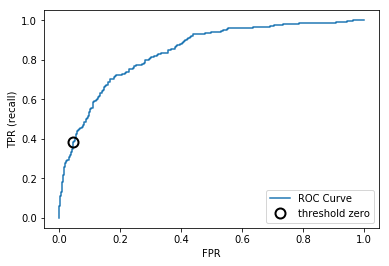

In [113]:
%matplotlib inline 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, svm.decision_function(X_test_reduced))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
auc = roc_auc_score(y_test, svm.decision_function(X_test_reduced))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
print("AUC curve", auc)

# PCA for Kernal SVM

In [114]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
             'kernel': ['linear','rbf','poly']}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best GRID score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best GRID score: 0.84


In [115]:
svm = SVC(kernel='linear', C=1, gamma=.1)
svm.fit(X_train_reduced, y_train)
            
print("train_score: {}".format(svm.score(X_train_reduced,y_train)))
print("test_score: {}".format(svm.score(X_test_reduced,y_test)))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

train_score: 0.8441521303974836
test_score: 0.8276157804459692


array([[874,  41],
       [160,  91]], dtype=int64)

([<matplotlib.axis.XTick at 0x2dd85e21550>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2dd85e26358>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       915
           1       0.69      0.36      0.48       251

   micro avg       0.83      0.83      0.83      1166
   macro avg       0.77      0.66      0.69      1166
weighted avg       0.81      0.83      0.81      1166

          


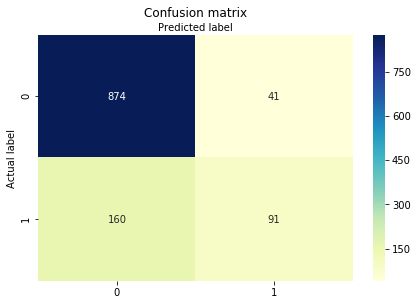

In [116]:
y_pred = svm.predict(X_test_reduced)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test, y_pred))
print("          ")

Text(0.5, 0, 'Precision')

Text(0, 0.5, 'Recall')

AUC curve 0.8388174079637734


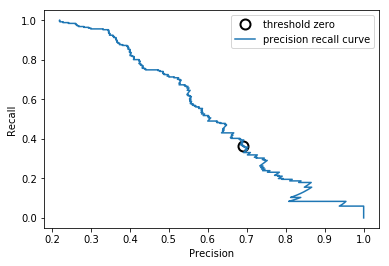

In [118]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

precision, recall, thresholds = precision_recall_curve(y_test, svm.decision_function(X_test_reduced))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
auc = roc_auc_score(y_test, svm.decision_function(X_test_reduced))
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

print("AUC curve", auc)

# Neural networks

In [119]:
## Imporitng Keras and other required packages
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(0) # for reproducibility

C:\Users\jayjay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jayjay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jayjay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jayjay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

# Building a neural network model with two hidden layers, 1 input layer and 1 output layer

In [148]:
def create_neuralnet():
    input_shap=65
    classifier = Sequential()
    classifier.add(Dense(100, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
    classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
    classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
    classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier

In [151]:
classifier = KerasClassifier(build_fn = create_neuralnet, verbose = 0)
param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= classifier, param_grid = param_grid, cv = 5)
grid_search_result = grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 40, 'epochs': 10}
Best cross-validation score: 0.84


In [152]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
# giving the input shape

input_shap=65
classifier = Sequential()
#Three hidden layers , 1 input and 1 output layer
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'relu', input_shape =(input_shap,)))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, y_train, batch_size = 40, epochs = 10)
y_predict = classifier.predict(X_test)

y_predict = np.where(y_predict > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)


Epoch 1/10
3497/3497 [==============================] - 2s 468us/sample - loss: 0.5649 - acc: 0.7818
Epoch 2/10
3497/3497 [==============================] - 1s 145us/sample - loss: 0.4426 - acc: 0.7875
Epoch 3/10
3497/3497 [==============================] - 1s 146us/sample - loss: 0.4078 - acc: 0.8138
Epoch 4/10
3497/3497 [==============================] - 0s 141us/sample - loss: 0.3892 - acc: 0.8350
Epoch 5/10
3497/3497 [==============================] - 1s 143us/sample - loss: 0.3794 - acc: 0.8344
Epoch 6/10
3497/3497 [==============================] - 0s 141us/sample - loss: 0.3740 - acc: 0.8419
Epoch 7/10
3497/3497 [==============================] - 0s 141us/sample - loss: 0.3643 - acc: 0.8439
Epoch 8/10
3497/3497 [==============================] - 0s 141us/sample - loss: 0.3600 - acc: 0.8484
Epoch 9/10
3497/3497 [==============================] - 0s 140us/sample - loss: 0.3521 - acc: 0.8547
Epoch 10/10
3497/3497 [==============================] - 0s 141us/sample - loss: 0.3521 - a

# Model evaluation

array([[889,  26],
       [168,  83]], dtype=int64)

([<matplotlib.axis.XTick at 0x2de2efc09e8>,
 <a list of 2 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x2de31fc8588>,
 <a list of 2 Text yticklabel objects>)

Text(0.5, 1.1, 'Confusion matrix')

Text(33.0, 0.5, 'Actual label')

Text(0.5, 257.44, 'Predicted label')

       Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       915
         1.0       0.76      0.33      0.46       251

   micro avg       0.83      0.83      0.83      1166
   macro avg       0.80      0.65      0.68      1166
weighted avg       0.82      0.83      0.81      1166

          


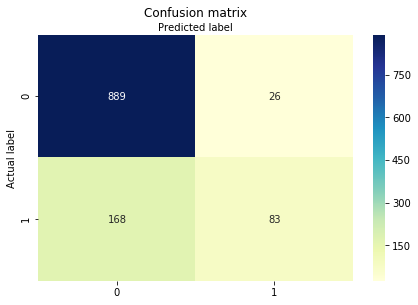

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_predict)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("       Classification Report")
print(classification_report(y_test1, y_predict))
print("          ")

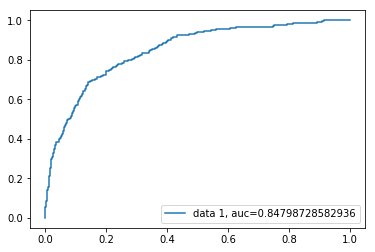

In [154]:
y_pred_proba = classifier.predict_proba(X_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Data comparison table

In [178]:
#import the spam dataset into a dataframe
import pandas as pd
Whether_statistics = pd.read_csv('Project2.csv', encoding='ISO-8859-1');
Whether_statistics 

,Model Name,Precision,Recall,AUC,Train_score,Test_score,Best_hyperparameter1,Best_hyperparameter2,Best_hyperparameter3
0,Hard voting,*******,*******,*******,0.84,0.84,*******,*******,*******
1,Soft voting,*******,*******,*******,0.85,0.84,*******,*******,*******
2,Bagging KNN,0.78,0.78,0.7795,0.79,0.79,max_samples': 300,'n_estimators': 300,'n_neighbors': 10
3,Bagging Decision Tree,0.85,0.97,0.8454,0.84,0.84,max_samples': 100,'n_estimators': 100,*******
4,Pasting KNN,0.79,1,0.7795,0.79,0.79,max_samples': 300,'n_estimators': 100,*******
5,Pasting Decision Tree,0.84,0.97,0.8454,0.84,0.84,max_samples': 100,'n_estimators': 300,*******
6,Adaboost Logistic regression,0.78,1,0.5,0.84,0.84,'learning_rate': 0.5,'n_estimators': 100,*******
7,Adaboost Decision trees,0.84,0.91,0.7805,0.84,0.84,'learning_rate': 0.5,'n_estimators': 300,*******
8,Gradient Boosting decision tree,0.86,0.95,0.82,0.91,0.84,'learning_rate': 0.5,'n_estimators': 300,'max_depth': 4
9,Neural Network,0.84,0.97,0.847,0.84,0.84,'batch_size': 40,'epochs': 10,*******


# Comparing the results before and after PCA, PCA does help in getting the results better because of AUC has improved in LinearSVC, kernalised support vector and also train and test error , precision and recall has improved substantially in all the models after running PCA